In [1]:
import pandas as pd

In [2]:
IPQ = pd.read_csv(r"C:\Users\goatp\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\IgroupPresenceQuestionnaire.csv")

In [3]:
IPQ.head()

,Timestamp,UniqueID,HeadSet,How many Headsets have you tried thus far?,"In the computer generated world I had a sense of ""being there""",Somehow I felt that the virtual world surrounded me.,I felt like I was just perceiving pictures.,(-) I did not feel present in the virtual space.,"I had a sense of acting in the virtual space, rather than operating something outside in real world.",I felt present in the virtual space.,"How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?",I was not aware of my real environment.,I still paid attention to the real environment.,How real did the virtual world seem to you?,How much did your experience in the virtual environment seem consistent with your real world experience ?,The virtual world seemed more realistic than the real world.,Gender
0,2/25/2025 13:01,0,HTC,1,3,4,2,1,4,3.0,2,2,4,3,3,2,Male
1,2/25/2025 13:24,0,Oculus,2,4,4,2,2,2,4.0,4,1,3,4,2,1,Male
2,2/25/2025 13:41,0,HP,3,2,3,3,4,2,4.0,4,1,4,4,2,2,Male
3,3/3/2025 13:00,1,HTC,1,4,4,3,4,3,4.0,3,1,3,3,3,1,Male
4,3/3/2025 13:18,1,HP,3,3,3,4,4,4,4.0,4,2,4,3,2,1,Male


In [ ]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Load and prepare data
df = pd.read_csv(r'C:\Users\goatp\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\IgroupPresenceQuestionnaire.csv')

# Strip whitespace in HeadSet and standardize
df['HeadSet'] = df['HeadSet'].str.strip()

# Rename columns
aw_col = [c for c in df.columns if c.startswith('How aware')][0]
df.rename(columns={
    'In the computer generated world I had a sense of "being there"': 'GP',
    'Somehow I felt that the virtual world surrounded me.': 'SP1',
    'I felt like I was just perceiving pictures.': 'SP2',
    '(-) I did not feel present in the virtual space.': 'SP3',
    'I had a sense of acting in the virtual space, rather than operating something outside in real world.': 'SP4',
    'I felt present in the virtual space.': 'SP5',
    aw_col: 'INV1',
    'I was not aware of my real environment.': 'INV2',
    'I still paid attention to the real environment.': 'INV3',
    'How real did the virtual world seem to you?': 'REAL1',
    'How much did your experience in the virtual environment seem consistent with your real world experience ?': 'REAL2',
    'The virtual world seemed more realistic than the real world.': 'REAL3'
}, inplace=True)

# Reverse-code negatively keyed items
df['SP2_rev'] = 4 - df['SP2']
df['SP3_rev'] = 4 - df['SP3']
df['INV1_rev'] = 4 - df['INV1']
df['INV3_rev'] = 4 - df['INV3']

# Compute subscale scores
df['GeneralPresence'] = df['GP']
df['SpatialPresence'] = df[['GP','SP1','SP2_rev','SP3_rev','SP4','SP5']].mean(axis=1)
df['Involvement']     = df[['INV1_rev','INV2','INV3_rev']].mean(axis=1)
df['Realism']         = df[['REAL1','REAL2','REAL3']].mean(axis=1)

# Identify participants with complete data for all headsets
treatments = df['HeadSet'].unique()
df['HeadSet'] = df['HeadSet'].astype(str)  # ensure string
treatments = df['HeadSet'].unique()
counts = df.groupby('UniqueID')['HeadSet'].nunique()
complete_ids = counts[counts == len(treatments)].index
df_balanced = df[df['UniqueID'].isin(complete_ids)]

print(f"Unique headsets considered: {treatments}")
print(f"Participants with data for all {len(treatments)} headsets: {len(complete_ids)}\n")
# Perform RM-ANOVA on balanced subset if possible
if len(complete_ids) > 0:
    for scale in ['GeneralPresence', 'SpatialPresence', 'Involvement', 'Realism']:
        rm = AnovaRM(df_balanced, depvar=scale, subject='UniqueID', within=['HeadSet']).fit()
        print(f"\n=== RM-ANOVA for {scale} ===")
        print(rm.anova_table)
else:
    print("Not enough complete blocks to perform a balanced RM-ANOVA.")


Unique headsets considered: ['HTC' 'Oculus' 'HP']
Participants with data for all 3 headsets: 24


=== RM-ANOVA for GeneralPresence ===
          F Value  Num DF  Den DF    Pr > F
HeadSet  0.378824     2.0    46.0  0.686782

=== RM-ANOVA for SpatialPresence ===
          F Value  Num DF  Den DF  Pr > F
HeadSet  0.582803     2.0    46.0  0.5624

=== RM-ANOVA for Involvement ===
          F Value  Num DF  Den DF    Pr > F
HeadSet  3.885501     2.0    46.0  0.027595

=== RM-ANOVA for Realism ===
          F Value  Num DF  Den DF   Pr > F
HeadSet  1.043406     2.0    46.0  0.36044


Data Overview:
Total observations: 72
Unique participants: 24
Headsets: ['HTC' 'Oculus' 'HP']
Gender distribution:
Gender
Female    39
Male      33
Name: count, dtype: int64

Unique headsets considered: ['HTC' 'Oculus' 'HP']
Participants with data for all 3 headsets: 24
Total balanced observations: 72
COMPREHENSIVE PRESENCE QUESTIONNAIRE ANALYSIS

==================== GENERALPRESENCE ANALYSIS ====================

Data summary for GeneralPresence:
Participants: 24
Observations: 72
Mean GeneralPresence: 3.292
SD GeneralPresence: 1.027
Range: 1.0 - 5.0

Data distribution by HeadSet:
HeadSet
HP        24
HTC       24
Oculus    24
dtype: int64

Data distribution by Gender:
Gender
Female    13
Male      11
Name: UniqueID, dtype: int64

Participants per condition:
Gender   Female  Male
HeadSet              
HP           13    11
HTC          13    11
Oculus       13    11

--- Mixed ANOVA Results for GeneralPresence ---
        Source        SS  DF1  DF2        MS         F     p-unc       n

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  headset_counts = scale_data.groupby(['HeadSet', 'UniqueID']).size().groupby('HeadSet').count()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  headset_counts = scale_data.groupby(['HeadSet', 'UniqueID']).size().groupby('HeadSet').count()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

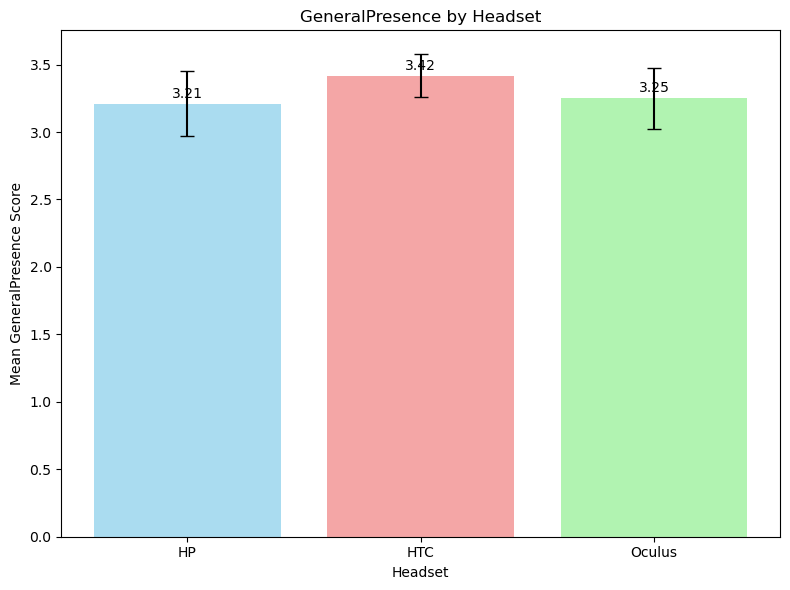

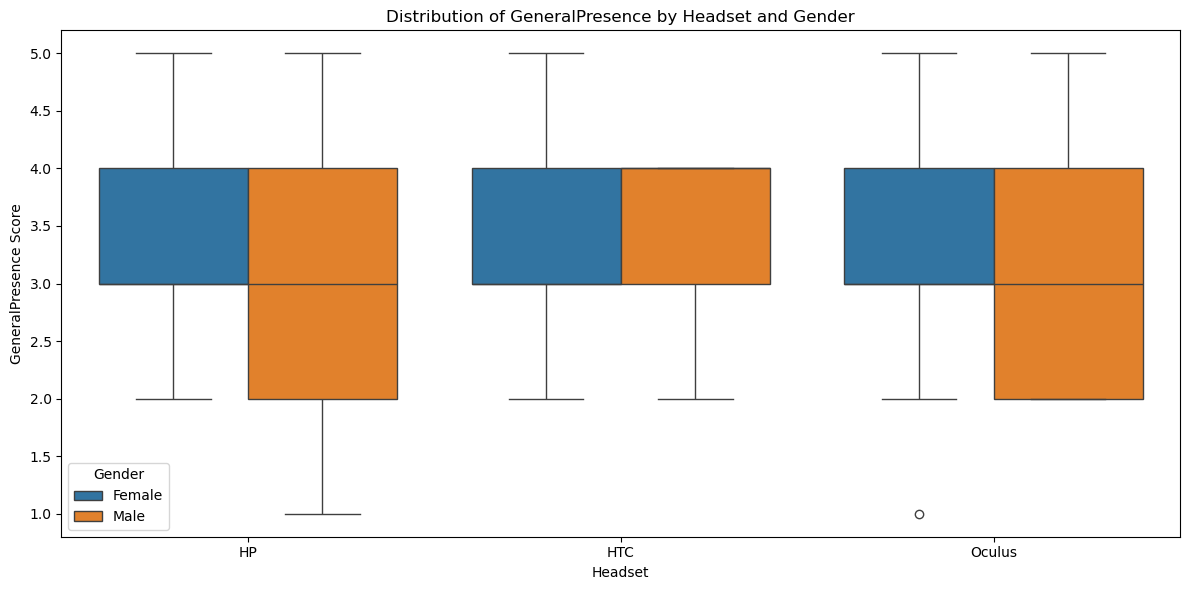

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:374: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].mean().unstack()


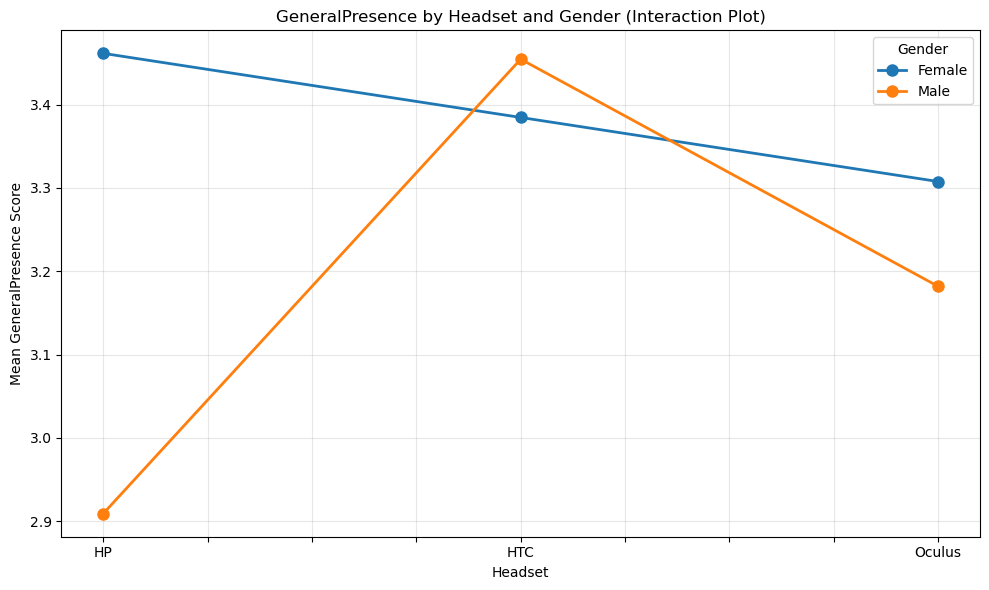

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:405: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data = gender_data.groupby('HeadSet')[scale_name].mean()


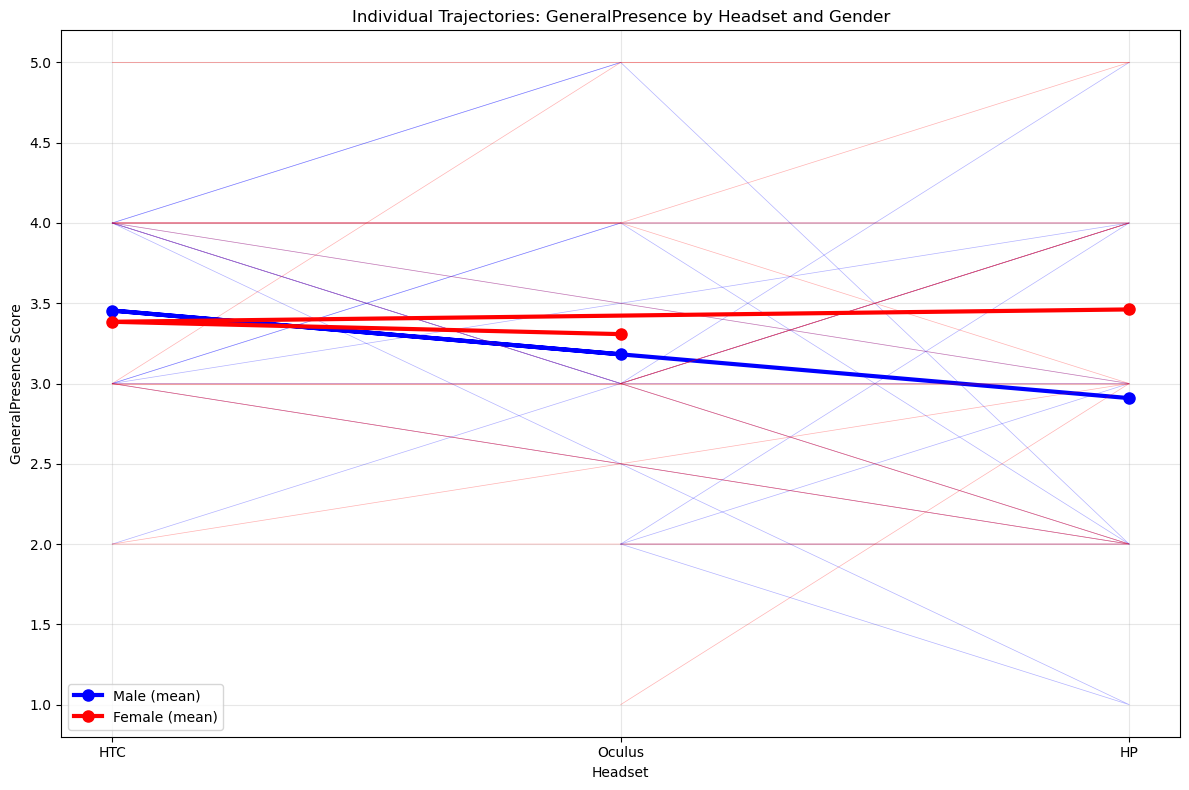

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:423: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].agg([
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  headset_counts = scale_data.groupby(['HeadSet', 'UniqueID']).size().groupby('HeadSet').count()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 


Descriptive Statistics for GeneralPresence:
                count   mean    std    sem  min  max
HeadSet Gender                                      
HP      Female     13  3.462  1.127  0.312    2    5
        Male       11  2.909  1.221  0.368    1    5
HTC     Female     13  3.385  0.870  0.241    2    5
        Male       11  3.455  0.688  0.207    2    4
Oculus  Female     13  3.308  1.109  0.308    1    5
        Male       11  3.182  1.168  0.352    2    5


==================== SPATIALPRESENCE ANALYSIS ====================

Data summary for SpatialPresence:
Participants: 24
Observations: 72
Mean SpatialPresence: 2.572
SD SpatialPresence: 0.584
Range: 1.3 - 3.7

Data distribution by HeadSet:
HeadSet
HP        24
HTC       24
Oculus    24
dtype: int64

Data distribution by Gender:
Gender
Female    13
Male      11
Name: UniqueID, dtype: int64

Participants per condition:
Gender   Female  Male
HeadSet              
HP           13    11
HTC          13    11
Oculus       13    11


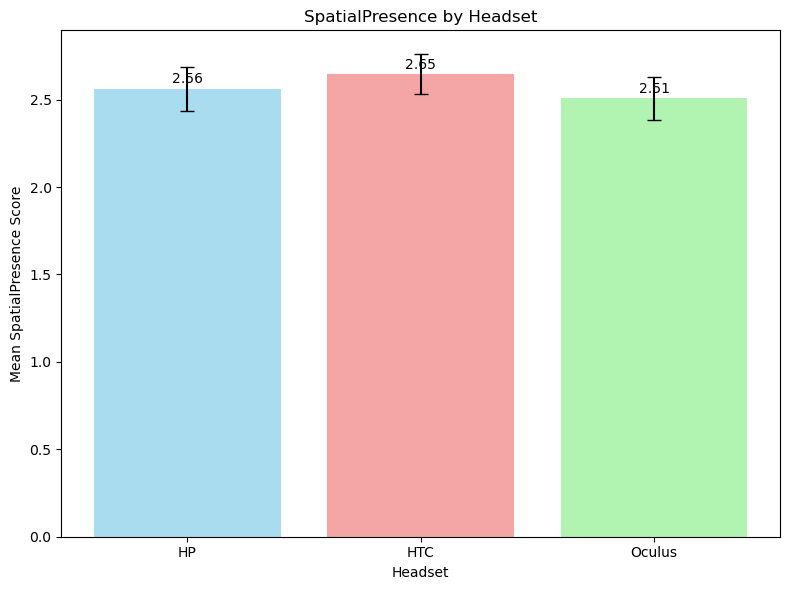

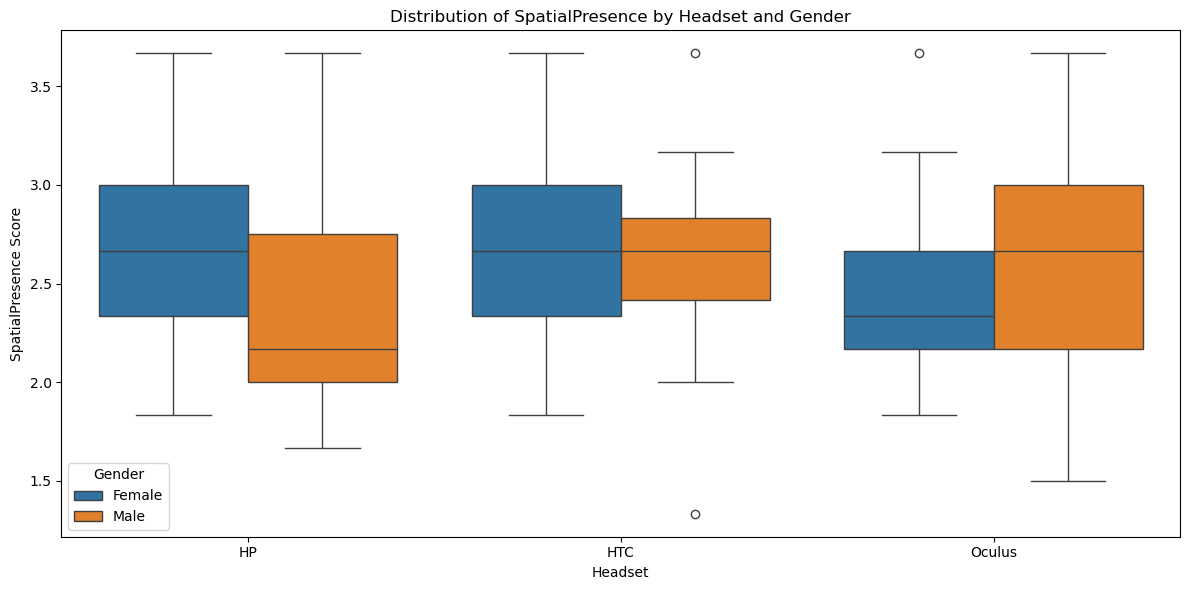

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:374: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].mean().unstack()


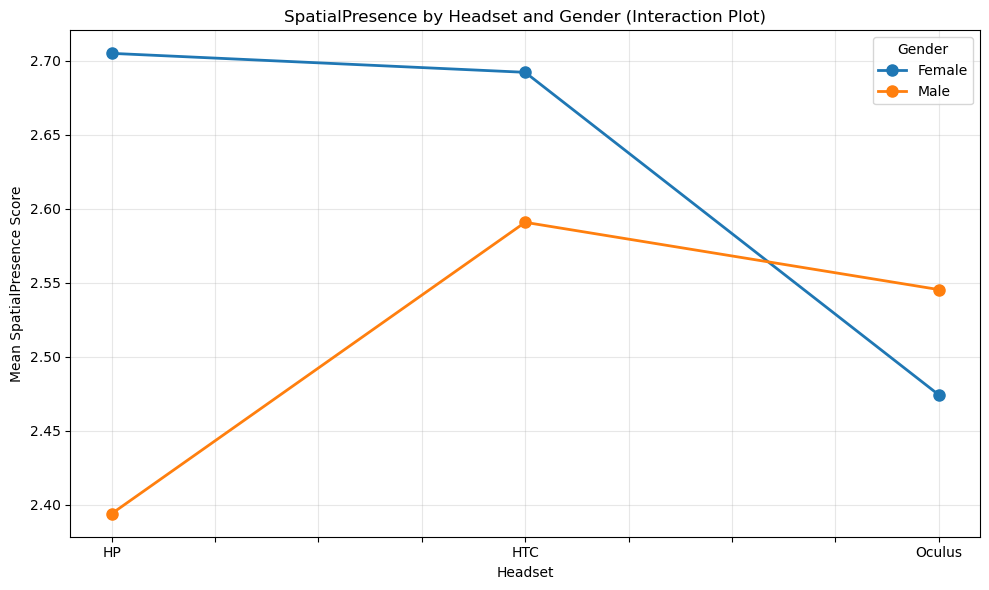

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:405: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data = gender_data.groupby('HeadSet')[scale_name].mean()


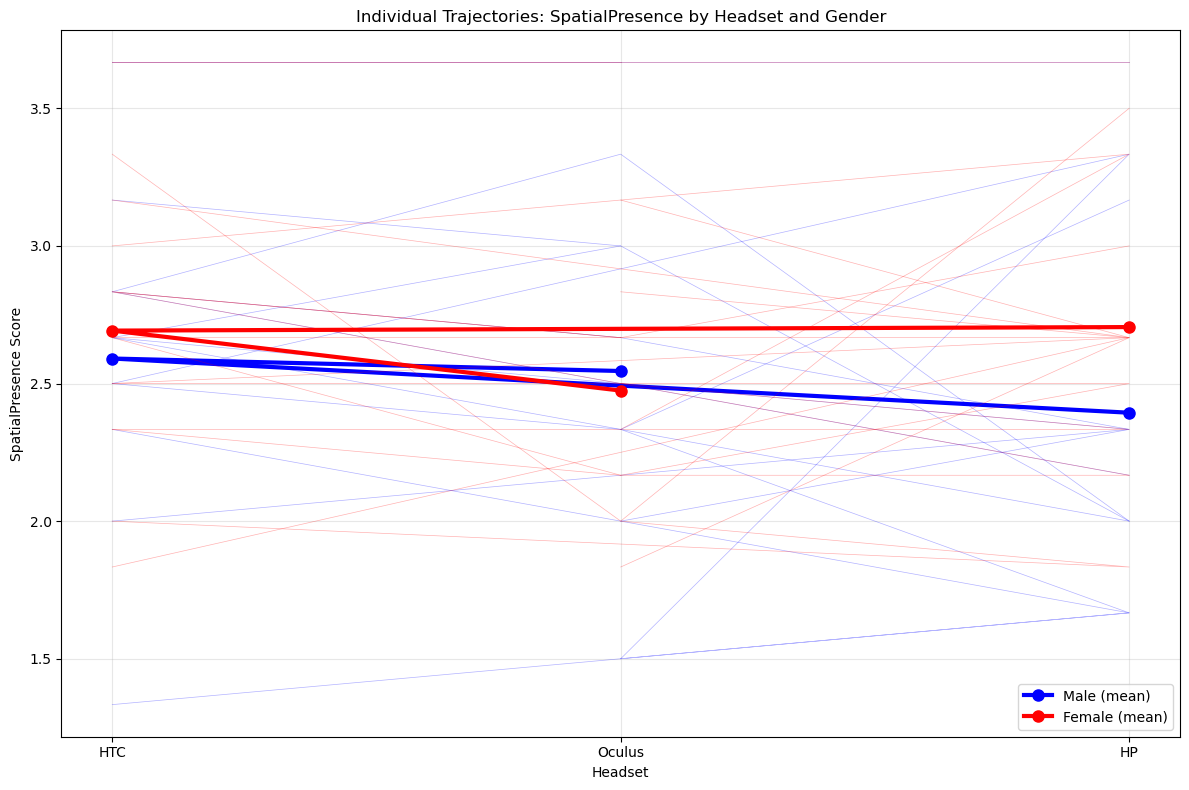

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:423: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].agg([
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  headset_counts = scale_data.groupby(['HeadSet', 'UniqueID']).size().groupby('HeadSet').count()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 


Descriptive Statistics for SpatialPresence:
                count   mean    std    sem    min    max
HeadSet Gender                                          
HP      Female     13  2.705  0.545  0.151  1.833  3.667
        Male       11  2.394  0.684  0.206  1.667  3.667
HTC     Female     13  2.692  0.522  0.145  1.833  3.667
        Male       11  2.591  0.603  0.182  1.333  3.667
Oculus  Female     13  2.474  0.522  0.145  1.833  3.667
        Male       11  2.545  0.700  0.211  1.500  3.667


==================== INVOLVEMENT ANALYSIS ====================

Data summary for Involvement:
Participants: 24
Observations: 72
Mean Involvement: 1.481
SD Involvement: 1.113
Range: -0.3 - 3.7

Data distribution by HeadSet:
HeadSet
HP        24
HTC       24
Oculus    24
dtype: int64

Data distribution by Gender:
Gender
Female    13
Male      11
Name: UniqueID, dtype: int64

Participants per condition:
Gender   Female  Male
HeadSet              
HP           13    11
HTC          13    11
Oculu

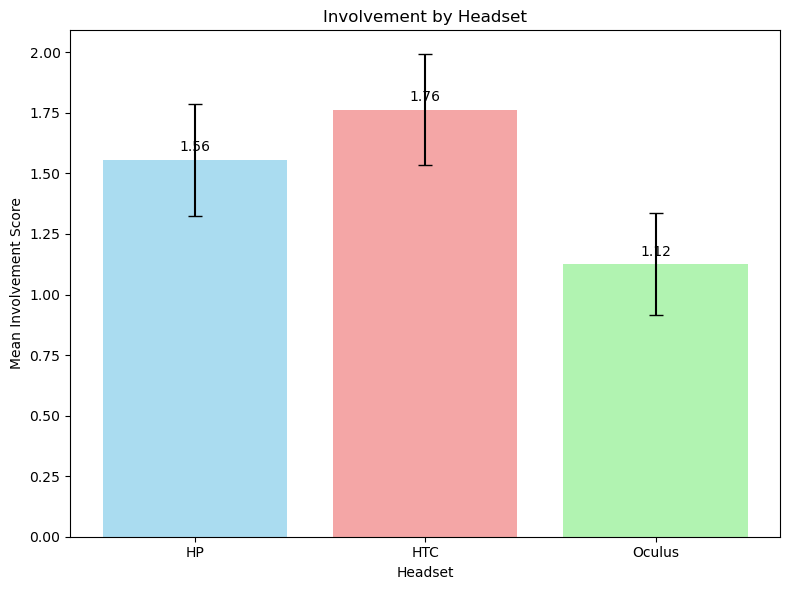

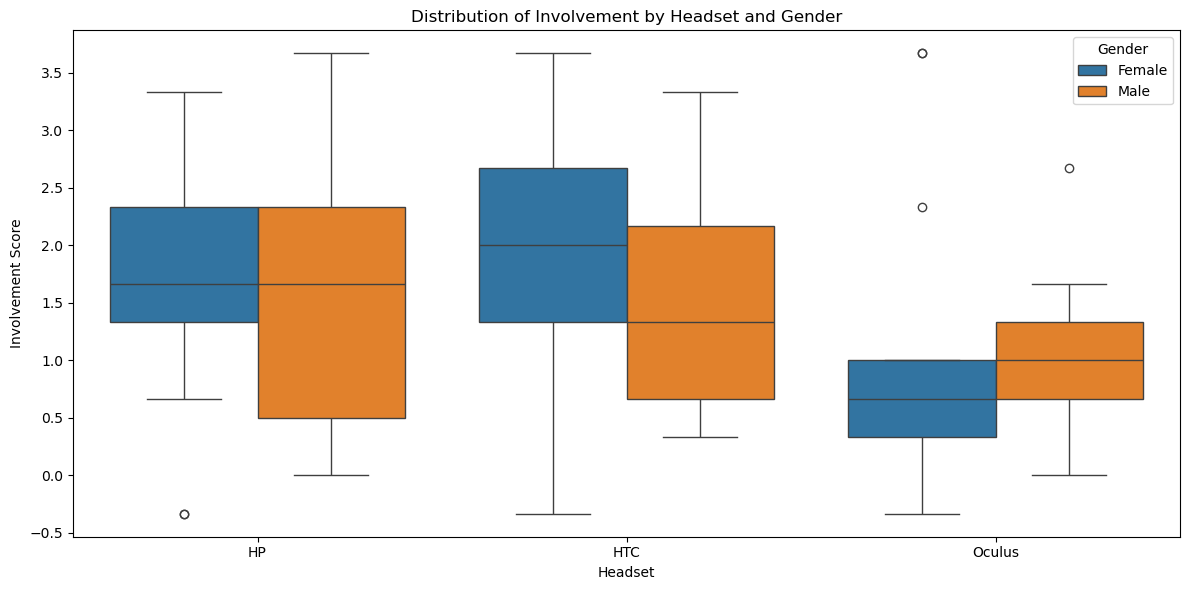

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:374: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].mean().unstack()


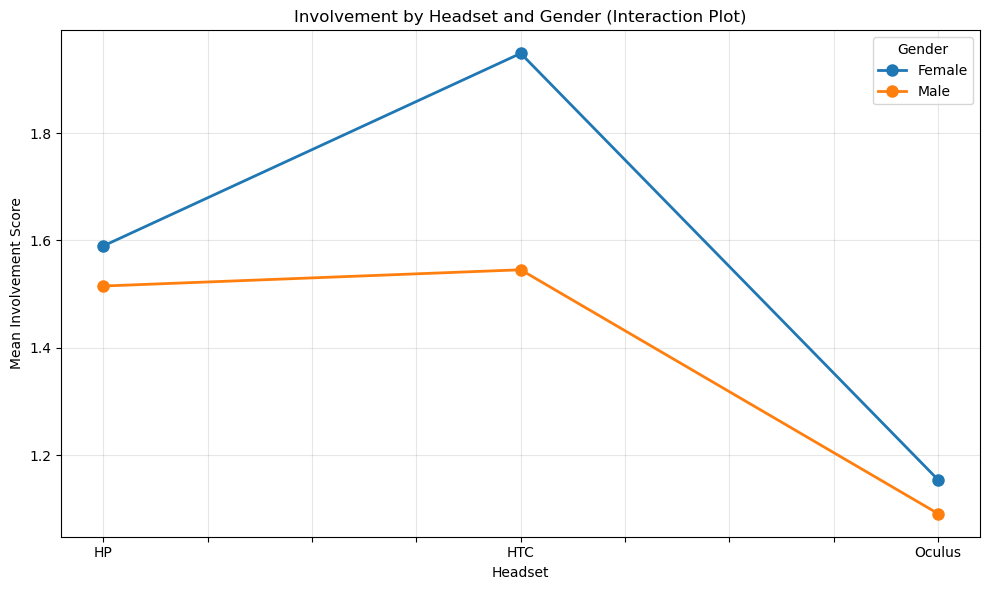

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:405: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data = gender_data.groupby('HeadSet')[scale_name].mean()


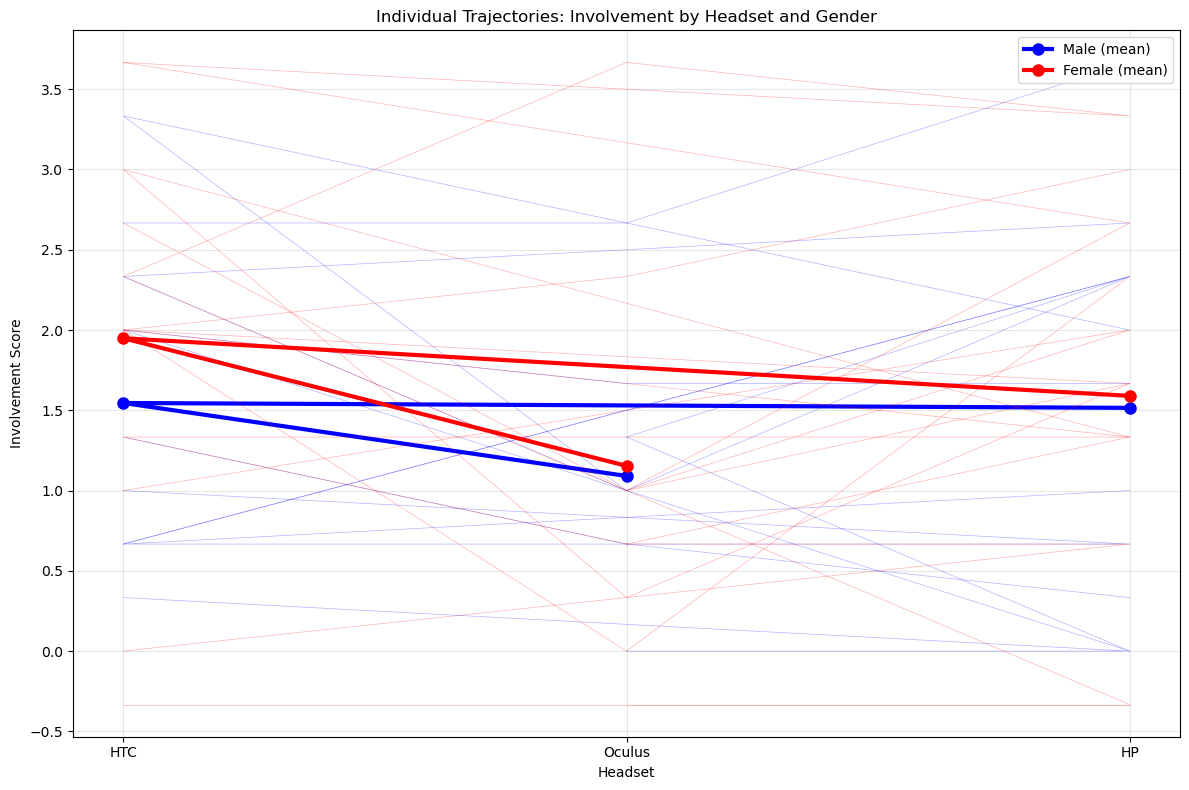

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:423: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].agg([
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  headset_counts = scale_data.groupby(['HeadSet', 'UniqueID']).size().groupby('HeadSet').count()
C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 


Descriptive Statistics for Involvement:
                count   mean    std    sem    min    max
HeadSet Gender                                          
HP      Female     13  1.590  1.132  0.314 -0.333  3.333
        Male       11  1.515  1.205  0.363  0.000  3.667
HTC     Female     13  1.949  1.224  0.339 -0.333  3.667
        Male       11  1.545  0.981  0.296  0.333  3.333
Oculus  Female     13  1.154  1.281  0.355 -0.333  3.667
        Male       11  1.091  0.685  0.206  0.000  2.667


==================== REALISM ANALYSIS ====================

Data summary for Realism:
Participants: 24
Observations: 72
Mean Realism: 2.551
SD Realism: 0.908
Range: 1.0 - 5.0

Data distribution by HeadSet:
HeadSet
HP        24
HTC       24
Oculus    24
dtype: int64

Data distribution by Gender:
Gender
Female    13
Male      11
Name: UniqueID, dtype: int64

Participants per condition:
Gender   Female  Male
HeadSet              
HP           13    11
HTC          13    11
Oculus       13    11

---

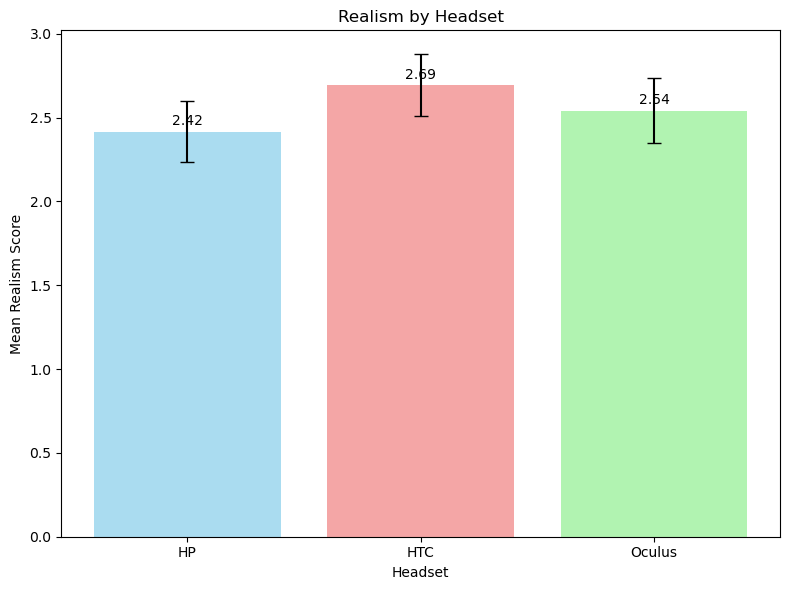

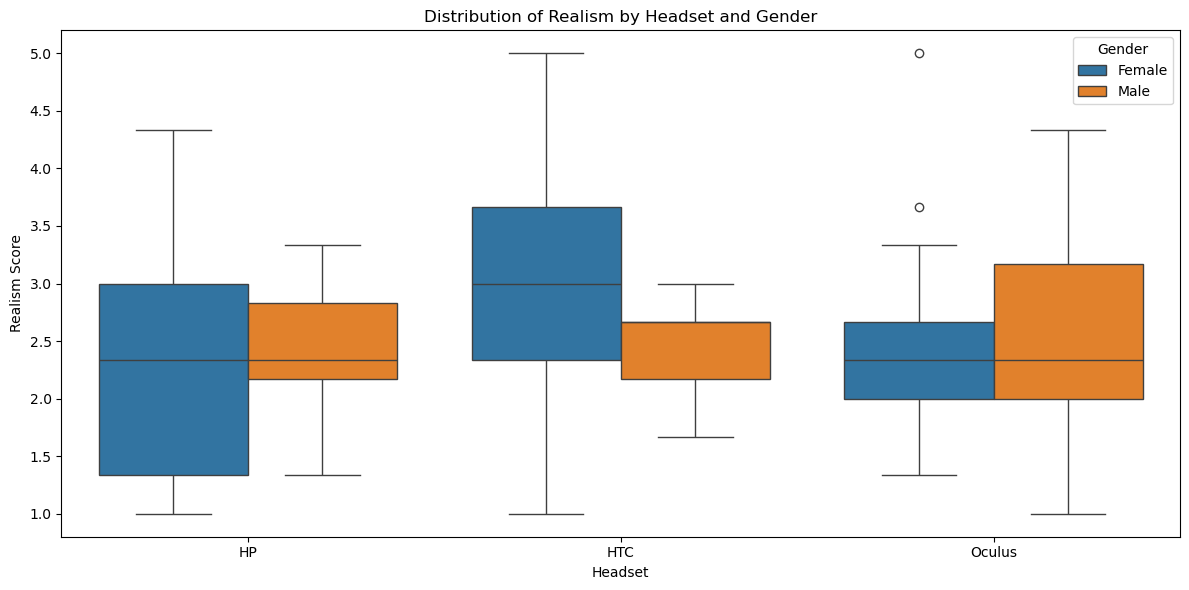

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:374: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].mean().unstack()


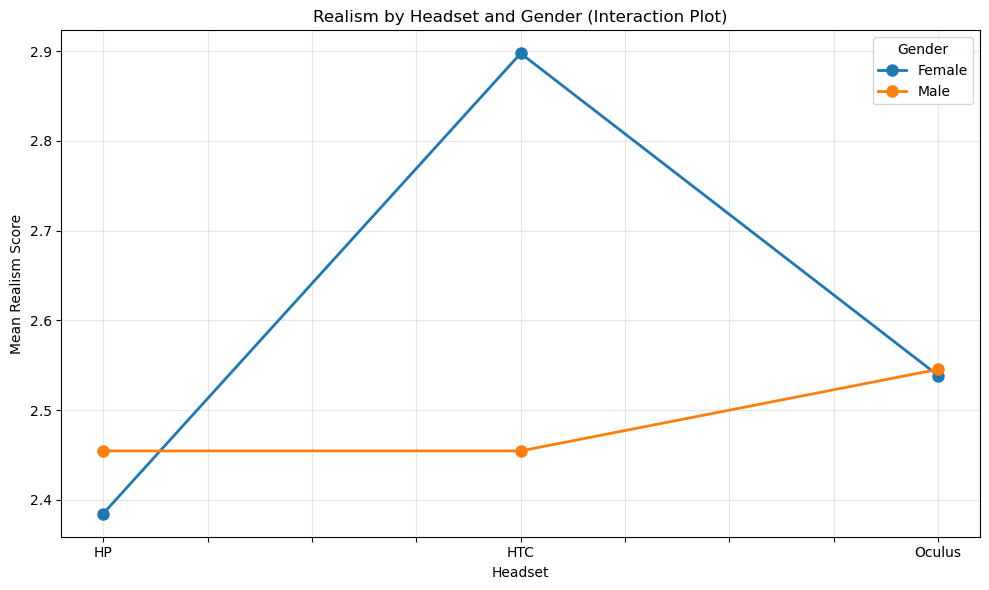

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:405: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data = gender_data.groupby('HeadSet')[scale_name].mean()


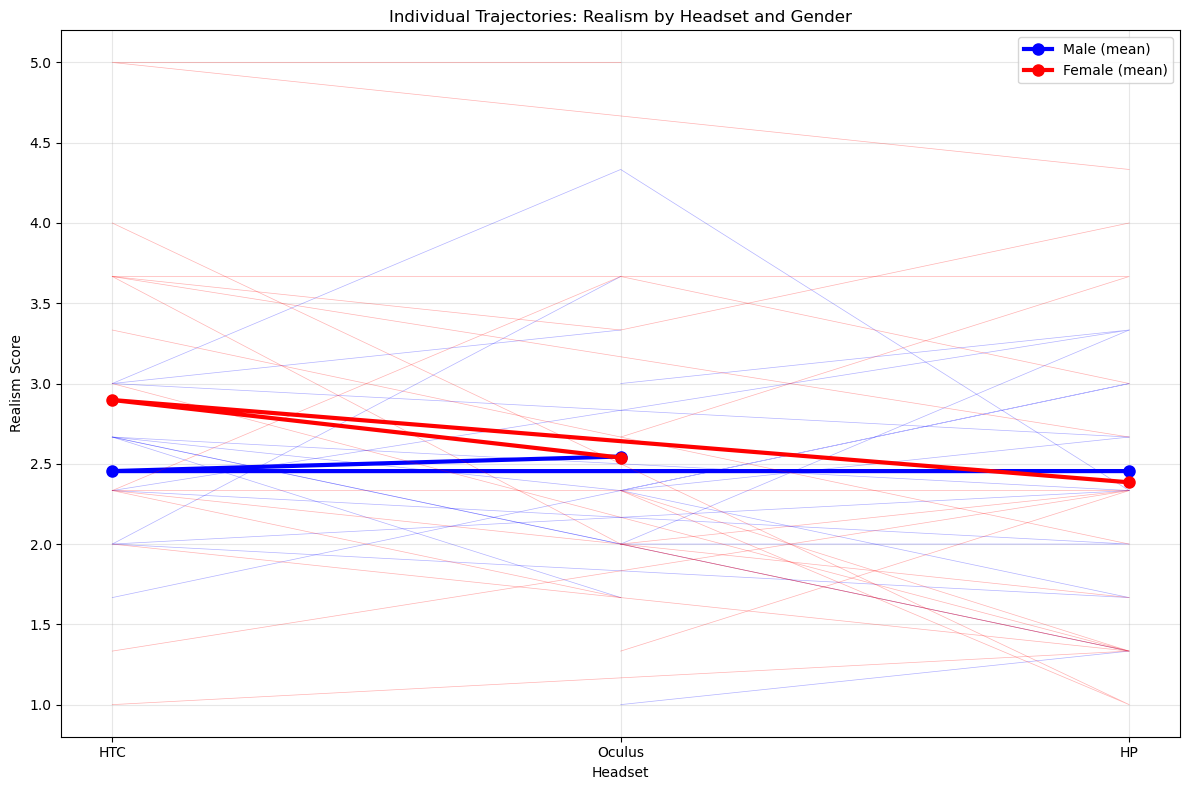

C:\Users\ITXPC\AppData\Local\Temp\ipykernel_43772\3862724922.py:423: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].agg([



Descriptive Statistics for Realism:
                count   mean    std    sem    min    max
HeadSet Gender                                          
HP      Female     13  2.385  1.096  0.304  1.000  4.333
        Male       11  2.455  0.637  0.192  1.333  3.333
HTC     Female     13  2.897  1.134  0.314  1.000  5.000
        Male       11  2.455  0.429  0.129  1.667  3.000
Oculus  Female     13  2.538  0.977  0.271  1.333  5.000
        Male       11  2.545  0.958  0.289  1.000  4.333


COMPARATIVE SUMMARY OF ALL PRESENCE SCALES
Statistical Summary (F-statistics, p-values, η²p, significance):
             Scale  HeadSet_F  HeadSet_p  HeadSet_eta2 HeadSet_sig  Gender_F  \
0  GeneralPresence     0.3751     0.6894        0.0168          No    0.4240   
1  SpatialPresence     0.6035     0.5514        0.0267          No    0.3453   
2      Involvement     3.7722     0.0308        0.1464         Yes    0.2451   
3          Realism     1.0456     0.3600        0.0454          No    0.1590 

KeyError: 'Interaction_sig'

In [1]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and prepare data
df = pd.read_csv(r'C:\Users\ITXPC\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\IgroupPresenceQuestionnaire.csv')

# Clean fields
df['HeadSet'] = df['HeadSet'].astype(str).str.strip()
df['Gender']  = df['Gender'].astype(str).str.strip().str.title()  # e.g., 'Male', 'Female'
df['Gender']  = df['Gender'].replace({'M':'Male','F':'Female'})    # just in case

print("Data Overview:")
print(f"Total observations: {len(df)}")
print(f"Unique participants: {df['UniqueID'].nunique()}")
print(f"Headsets: {df['HeadSet'].unique()}")
print(f"Gender distribution:\n{df['Gender'].value_counts()}")

# Rename columns (same as you had)
aw_col = [c for c in df.columns if c.startswith('How aware')][0]
df.rename(columns={
    'In the computer generated world I had a sense of "being there"': 'GP',
    'Somehow I felt that the virtual world surrounded me.': 'SP1',
    'I felt like I was just perceiving pictures.': 'SP2',
    '(-) I did not feel present in the virtual space.': 'SP3',
    'I had a sense of acting in the virtual space, rather than operating something outside in real world.': 'SP4',
    'I felt present in the virtual space.': 'SP5',
    aw_col: 'INV1',
    'I was not aware of my real environment.': 'INV2',
    'I still paid attention to the real environment.': 'INV3',
    'How real did the virtual world seem to you?': 'REAL1',
    'How much did your experience in the virtual environment seem consistent with your real world experience ?': 'REAL2',
    'The virtual world seemed more realistic than the real world.': 'REAL3'
}, inplace=True)

# Reverse-code
df['SP2_rev'] = 4 - df['SP2']
df['SP3_rev'] = 4 - df['SP3']
df['INV1_rev'] = 4 - df['INV1']
df['INV3_rev'] = 4 - df['INV3']

# Subscales
df['GeneralPresence'] = df['GP']
df['SpatialPresence'] = df[['GP','SP1','SP2_rev','SP3_rev','SP4','SP5']].mean(axis=1)
df['Involvement']     = df[['INV1_rev','INV2','INV3_rev']].mean(axis=1)
df['Realism']         = df[['REAL1','REAL2','REAL3']].mean(axis=1)

# Balance: keep only participants who have data for all headset levels
treatments = df['HeadSet'].unique()
counts = df.groupby('UniqueID')['HeadSet'].nunique()
complete_ids = counts[counts == len(treatments)].index
df_balanced = df[df['UniqueID'].isin(complete_ids)].copy()

print(f"\nUnique headsets considered: {treatments}")
print(f"Participants with data for all {len(treatments)} headsets: {len(complete_ids)}")
print(f"Total balanced observations: {len(df_balanced)}")

# Comprehensive analysis function
def analyze_presence_scale(scale_name, df_data):
    """Comprehensive RMANOVA analysis for a presence scale"""
    print(f"\n{'='*20} {scale_name.upper()} ANALYSIS {'='*20}")
    
    # Clean data for this scale
    scale_data = df_data[['UniqueID', 'HeadSet', 'Gender', scale_name]].dropna()
    
    # Ensure categorical types
    scale_data['UniqueID'] = scale_data['UniqueID'].astype(str)
    scale_data['HeadSet'] = scale_data['HeadSet'].astype('category')
    scale_data['Gender'] = scale_data['Gender'].astype('category')
    
    if len(scale_data) == 0:
        print(f"No valid data for {scale_name}")
        return None
    
    print(f"\nData summary for {scale_name}:")
    print(f"Participants: {scale_data['UniqueID'].nunique()}")
    print(f"Observations: {len(scale_data)}")
    print(f"Mean {scale_name}: {scale_data[scale_name].mean():.3f}")
    print(f"SD {scale_name}: {scale_data[scale_name].std():.3f}")
    print(f"Range: {scale_data[scale_name].min():.1f} - {scale_data[scale_name].max():.1f}")
    
    # Check data distribution
    print(f"\nData distribution by HeadSet:")
    headset_counts = scale_data.groupby(['HeadSet', 'UniqueID']).size().groupby('HeadSet').count()
    print(headset_counts)
    
    print(f"\nData distribution by Gender:")
    gender_counts = scale_data.groupby('Gender')['UniqueID'].nunique()
    print(gender_counts)
    
    # Check completeness
    participants_per_condition = scale_data.groupby(['HeadSet', 'Gender']).size().unstack(fill_value=0)
    print(f"\nParticipants per condition:")
    print(participants_per_condition)
    
    # Mixed ANOVA (HeadSet within, Gender between)
    results = {}
    
    try:
        print(f"\n--- Mixed ANOVA Results for {scale_name} ---")
        anova_result = pg.mixed_anova(
            data=scale_data,
            dv=scale_name,
            within='HeadSet',
            between='Gender',
            subject='UniqueID',
            effsize='np2'
        )
        print(anova_result)
        results['mixed_anova'] = anova_result
        
        # Extract and display effect sizes
        print(f"\nEffect Sizes (η²p):")
        for idx, row in anova_result.iterrows():
            source = row['Source']
            if 'np2' in anova_result.columns:
                effect_size = row['np2']
                interpretation = ""
                if effect_size >= 0.14:
                    interpretation = " (large)"
                elif effect_size >= 0.06:
                    interpretation = " (medium)"
                elif effect_size >= 0.01:
                    interpretation = " (small)"
                print(f"  {source}: η²p = {effect_size:.3f}{interpretation}")
        
        # Post-hoc analyses
        print(f"\n--- Post-hoc Analyses for {scale_name} ---")
        
        # Main effect of HeadSet
        headset_mask = anova_result['Source'] == 'HeadSet'
        if headset_mask.any():
            headset_p = anova_result.loc[headset_mask, 'p-unc'].iloc[0]
            headset_f = anova_result.loc[headset_mask, 'F'].iloc[0]
            headset_eta2 = anova_result.loc[headset_mask, 'np2'].iloc[0] if 'np2' in anova_result.columns else 'N/A'
            print(f"\nHeadSet main effect: F = {headset_f:.3f}, p = {headset_p:.4f}, η²p = {headset_eta2:.3f}")
            
            if headset_p < 0.05:
                print("Significant main effect of HeadSet - performing pairwise comparisons:")
                pairwise_headset = pg.pairwise_tests(
                    data=scale_data,
                    dv=scale_name,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='holm'  # Changed to holm as in your original code
                )
                print("\nPairwise comparisons (Holm correction):")
                display_cols = ['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']
                print(pairwise_headset[display_cols])
                results['pairwise_headset'] = pairwise_headset
                
                # Additional pairwise with different corrections
                pairwise_bonf = pg.pairwise_tests(
                    data=scale_data,
                    dv=scale_name,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='bonferroni'
                )
                print("\nPairwise comparisons (Bonferroni correction):")
                print(pairwise_bonf[display_cols])
                results['pairwise_bonferroni'] = pairwise_bonf
            else:
                print("No significant main effect of HeadSet")
        
        # Main effect of Gender
        gender_mask = anova_result['Source'] == 'Gender'
        if gender_mask.any():
            gender_p = anova_result.loc[gender_mask, 'p-unc'].iloc[0]
            gender_f = anova_result.loc[gender_mask, 'F'].iloc[0]
            gender_eta2 = anova_result.loc[gender_mask, 'np2'].iloc[0] if 'np2' in anova_result.columns else 'N/A'
            print(f"\nGender main effect: F = {gender_f:.3f}, p = {gender_p:.4f}, η²p = {gender_eta2:.3f}")
            
            if gender_p < 0.05:
                print("Significant main effect of Gender:")
                gender_means = scale_data.groupby('Gender')[scale_name].agg(['mean', 'std', 'sem', 'count'])
                print(gender_means.round(3))
                
                # Effect size for gender difference
                if len(scale_data['Gender'].unique()) == 2:
                    genders = scale_data['Gender'].unique()
                    group1 = scale_data[scale_data['Gender'] == genders[0]][scale_name]
                    group2 = scale_data[scale_data['Gender'] == genders[1]][scale_name]
                    cohen_d = pg.compute_effsize(group1, group2, eftype='cohen')
                    print(f"Cohen's d for gender difference: {cohen_d:.3f}")
            else:
                print("No significant main effect of Gender")
        
        # Interaction effect
        interaction_names = ['HeadSet * Gender', 'Gender * HeadSet', 'HeadSet:Gender']
        interaction_p = None
        interaction_f = None
        interaction_eta2 = None
        
        for name in interaction_names:
            interaction_mask = anova_result['Source'] == name
            if interaction_mask.any():
                interaction_p = anova_result.loc[interaction_mask, 'p-unc'].iloc[0]
                interaction_f = anova_result.loc[interaction_mask, 'F'].iloc[0]
                interaction_eta2 = anova_result.loc[interaction_mask, 'np2'].iloc[0] if 'np2' in anova_result.columns else 'N/A'
                print(f"\nHeadSet × Gender interaction: F = {interaction_f:.3f}, p = {interaction_p:.4f}, η²p = {interaction_eta2:.3f}")
                break
        
        if interaction_p is not None and interaction_p < 0.05:
            print("Significant interaction - performing simple effects analysis:")
            
            # Simple effects: HeadSet effect within each gender
            for gender in scale_data['Gender'].unique():
                gender_subset = scale_data[scale_data['Gender'] == gender]
                if gender_subset['UniqueID'].nunique() > 1:
                    try:
                        simple_effect = pg.rm_anova(
                            data=gender_subset,
                            dv=scale_name,
                            within='HeadSet',
                            subject='UniqueID'
                        )
                        se_p = simple_effect['p-unc'].iloc[0]
                        se_f = simple_effect['F'].iloc[0]
                        print(f"  HeadSet effect for {gender}: F = {se_f:.3f}, p = {se_p:.4f}")
                        
                        if se_p < 0.05:
                            pairwise_simple = pg.pairwise_tests(
                                data=gender_subset,
                                dv=scale_name,
                                within='HeadSet',
                                subject='UniqueID',
                                padjust='holm'
                            )
                            print(f"  Pairwise comparisons for {gender} (Holm correction):")
                            print(pairwise_simple[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])
                    except Exception as e:
                        print(f"  Could not analyze simple effects for {gender}: {e}")
        elif interaction_p is not None:
            print("No significant HeadSet × Gender interaction")
        
    except Exception as e:
        print(f"Error running mixed ANOVA for {scale_name}: {e}")
        print("Attempting repeated measures ANOVA without between-subjects factor...")
        
        # Fallback to simple repeated measures ANOVA
        try:
            rm_anova_result = pg.rm_anova(
                data=scale_data,
                dv=scale_name,
                within='HeadSet',
                subject='UniqueID'
            )
            print(f"\nRepeated Measures ANOVA Results for {scale_name}:")
            print(rm_anova_result)
            results['rm_anova'] = rm_anova_result
            
            rm_p = rm_anova_result['p-unc'].iloc[0]
            rm_f = rm_anova_result['F'].iloc[0]
            print(f"HeadSet effect: F = {rm_f:.3f}, p = {rm_p:.4f}")
            
            if rm_p < 0.05:
                print("Significant effect of HeadSet - performing pairwise comparisons:")
                pairwise_rm = pg.pairwise_tests(
                    data=scale_data,
                    dv=scale_name,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='holm'
                )
                print(pairwise_rm[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])
                results['pairwise_rm'] = pairwise_rm
        
        except Exception as e2:
            print(f"Error running repeated measures ANOVA: {e2}")
    
    # Assumption checks
    print(f"\n--- Assumption Checks for {scale_name} ---")
    
    # Sphericity test (for within-subjects factor)
    try:
        sphericity = pg.sphericity(data=scale_data, dv=scale_name, within='HeadSet', subject='UniqueID')
        print(f"Sphericity test: W = {sphericity['W'].iloc[0]:.4f}, p = {sphericity['pval'].iloc[0]:.4f}")
        sphericity_violated = sphericity['pval'].iloc[0] < 0.05
        print(f"Sphericity assumption {'violated' if sphericity_violated else 'met'}")
        
        if sphericity_violated:
            print("Note: Consider using Greenhouse-Geisser or Huynh-Feldt corrections")
            # Get corrected results if available
            if 'eps' in sphericity.columns:
                eps_gg = sphericity['eps'].iloc[0]
                print(f"Greenhouse-Geisser epsilon: {eps_gg:.3f}")
        
        results['sphericity'] = sphericity
    except Exception as e:
        print(f"Could not perform sphericity test: {e}")
    
    # Normality tests by condition
    print(f"\nNormality tests by HeadSet and Gender:")
    normality_violations = 0
    total_tests = 0
    
    for headset in scale_data['HeadSet'].unique():
        for gender in scale_data['Gender'].unique():
            subset = scale_data[(scale_data['HeadSet'] == headset) & 
                               (scale_data['Gender'] == gender)]
            if len(subset) >= 3:
                try:
                    normality = pg.normality(subset[scale_name])
                    w_stat = normality['W'].iloc[0]
                    p_val = normality['pval'].iloc[0]
                    is_normal = p_val >= 0.05
                    print(f"  {headset} - {gender}: W = {w_stat:.4f}, p = {p_val:.4f} {'✓' if is_normal else '✗'}")
                    total_tests += 1
                    if not is_normal:
                        normality_violations += 1
                except Exception as e:
                    print(f"  {headset} - {gender}: Could not test normality - {e}")
    
    if total_tests > 0:
        print(f"\nNormality summary: {normality_violations}/{total_tests} conditions violated normality assumption")
    
    # Homogeneity of variance
    try:
        print(f"\nHomogeneity of variance tests:")
        # Test by HeadSet
        levene_headset = pg.homoscedasticity(data=scale_data, dv=scale_name, group='HeadSet')
        print(f"Levene's test by HeadSet: {levene_headset}")
        
        # Test by Gender
        if len(scale_data['Gender'].unique()) > 1:
            levene_gender = pg.homoscedasticity(data=scale_data, dv=scale_name, group='Gender')
            print(f"Levene's test by Gender: {levene_gender}")
        
    except Exception as e:
        print(f"Could not perform homogeneity tests: {e}")
    
    # Visualizations
    print(f"\n--- Creating Visualizations for {scale_name} ---")
    
    # Plot 1: Bar plot by headset
    try:
        means = scale_data.groupby('HeadSet')[scale_name].mean()
        sems = scale_data.groupby('HeadSet')[scale_name].sem()
        
        fig, ax = plt.subplots(figsize=(8, 6))
        bars = ax.bar(means.index, means.values, yerr=sems.values, 
                      capsize=5, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'])
        ax.set_title(f'{scale_name} by Headset')
        ax.set_ylabel(f'Mean {scale_name} Score')
        ax.set_xlabel('Headset')
        
        # Add value labels
        for bar, mean_val in zip(bars, means.values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(sems.values)*0.1, 
                    f'{mean_val:.2f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create bar plot: {e}")
    
    # Plot 2: Box plot by headset and gender
    try:
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.boxplot(data=scale_data, x='HeadSet', y=scale_name, hue='Gender', ax=ax)
        ax.set_title(f'Distribution of {scale_name} by Headset and Gender')
        ax.set_ylabel(f'{scale_name} Score')
        ax.set_xlabel('Headset')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create box plot: {e}")
    
    # Plot 3: Interaction plot
    try:
        pivot = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].mean().unstack()
        if not pivot.empty and pivot.shape[1] > 1:
            fig, ax = plt.subplots(figsize=(10, 6))
            pivot.plot(kind='line', marker='o', linewidth=2, markersize=8, ax=ax)
            ax.set_title(f'{scale_name} by Headset and Gender (Interaction Plot)')
            ax.set_ylabel(f'Mean {scale_name} Score')
            ax.set_xlabel('Headset')
            ax.legend(title='Gender')
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Could not create interaction plot: {e}")
    
    # Plot 4: Individual trajectories
    try:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Plot individual participant lines by gender
        colors = {'Male': 'blue', 'Female': 'red'}
        for gender in scale_data['Gender'].unique():
            gender_data = scale_data[scale_data['Gender'] == gender]
            
            # Plot individual lines
            for participant in gender_data['UniqueID'].unique():
                participant_data = gender_data[gender_data['UniqueID'] == participant]
                if len(participant_data) > 1:
                    ax.plot(participant_data['HeadSet'], participant_data[scale_name], 
                           alpha=0.3, linewidth=0.5, color=colors.get(gender, 'gray'))
            
            # Plot mean line
            mean_data = gender_data.groupby('HeadSet')[scale_name].mean()
            ax.plot(mean_data.index, mean_data.values, 
                   marker='o', linewidth=3, markersize=8, 
                   label=f'{gender} (mean)', color=colors.get(gender, 'gray'))
        
        ax.set_title(f'Individual Trajectories: {scale_name} by Headset and Gender')
        ax.set_ylabel(f'{scale_name} Score')
        ax.set_xlabel('Headset')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create trajectory plot: {e}")
    
    # Summary statistics table
    print(f"\nDescriptive Statistics for {scale_name}:")
    try:
        summary_stats = scale_data.groupby(['HeadSet', 'Gender'])[scale_name].agg([
            'count', 'mean', 'std', 'sem', 'min', 'max'
        ]).round(3)
        print(summary_stats)
    except Exception as e:
        print(f"Could not generate summary statistics: {e}")
    
    print(f"\n{'='*60}")
    return results

# ============================================================================
# RUN COMPREHENSIVE ANALYSES FOR ALL SCALES
# ============================================================================

print("="*80)
print("COMPREHENSIVE PRESENCE QUESTIONNAIRE ANALYSIS")
print("="*80)

scales = ['GeneralPresence', 'SpatialPresence', 'Involvement', 'Realism']
all_results = {}

if len(complete_ids) > 0:
    for scale in scales:
        all_results[scale] = analyze_presence_scale(scale, df_balanced)
else:
    print("No participants with complete data for all headset conditions!")

# ============================================================================
# COMPARATIVE SUMMARY
# ============================================================================

print("\n" + "="*80)
print("COMPARATIVE SUMMARY OF ALL PRESENCE SCALES")
print("="*80)

def extract_key_results(results, scale_name):
    """Extract key statistical results for summary table"""
    summary = {'Scale': scale_name}
    
    if results and 'mixed_anova' in results:
        anova_result = results['mixed_anova']
        
        # HeadSet effect
        headset_mask = anova_result['Source'] == 'HeadSet'
        if headset_mask.any():
            summary['HeadSet_F'] = anova_result.loc[headset_mask, 'F'].iloc[0]
            summary['HeadSet_p'] = anova_result.loc[headset_mask, 'p-unc'].iloc[0]
            summary['HeadSet_eta2'] = anova_result.loc[headset_mask, 'np2'].iloc[0] if 'np2' in anova_result.columns else None
            summary['HeadSet_sig'] = 'Yes' if summary['HeadSet_p'] < 0.05 else 'No'
        
        # Gender effect
        gender_mask = anova_result['Source'] == 'Gender'
        if gender_mask.any():
            summary['Gender_F'] = anova_result.loc[gender_mask, 'F'].iloc[0]
            summary['Gender_p'] = anova_result.loc[gender_mask, 'p-unc'].iloc[0]
            summary['Gender_eta2'] = anova_result.loc[gender_mask, 'np2'].iloc[0] if 'np2' in anova_result.columns else None
            summary['Gender_sig'] = 'Yes' if summary['Gender_p'] < 0.05 else 'No'
        
        # Interaction effect
        interaction_names = ['HeadSet * Gender', 'Gender * HeadSet', 'HeadSet:Gender']
        for name in interaction_names:
            interaction_mask = anova_result['Source'] == name
            if interaction_mask.any():
                summary['Interaction_F'] = anova_result.loc[interaction_mask, 'F'].iloc[0]
                summary['Interaction_p'] = anova_result.loc[interaction_mask, 'p-unc'].iloc[0]
                summary['Interaction_eta2'] = anova_result.loc[interaction_mask, 'np2'].iloc[0] if 'np2' in anova_result.columns else None
                summary['Interaction_sig'] = 'Yes' if summary['Interaction_p'] < 0.05 else 'No'
                break
    
    return summary

# Create comprehensive summary table
if all_results:
    summary_list = []
    for scale in scales:
        if all_results[scale]:
            summary_list.append(extract_key_results(all_results[scale], scale))
    
    if summary_list:
        summary_df = pd.DataFrame(summary_list)
        
        print("Statistical Summary (F-statistics, p-values, η²p, significance):")
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        print(summary_df.round(4))
        
        # Count significant effects
        headset_sig = summary_df['HeadSet_sig'].value_counts().get('Yes', 0)
        gender_sig = summary_df['Gender_sig'].value_counts().get('Yes', 0)
        interaction_sig = summary_df['Interaction_sig'].value_counts().get('Yes', 0)
        
        print(f"\nSignificant effects summary:")
        print(f"HeadSet main effects: {headset_sig}/{len(scales)} scales")
        print(f"Gender main effects: {gender_sig}/{len(scales)} scales")
        print(f"HeadSet × Gender interactions: {interaction_sig}/{len(scales)} scales")


Unique headsets considered: ['HTC' 'Oculus' 'HP']
Participants with data for all 3 headsets: 24


=== Mixed ANOVA for GeneralPresence (within: HeadSet, between: Gender) ===
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       Gender  0.735140    1   22  0.735140  0.424047  0.521669  0.018910   
1      HeadSet  0.583333    2   44  0.291667  0.375136  0.689372  0.016766   
2  Interaction  1.206876    2   44  0.603438  0.776131  0.466380  0.034077   

        eps  
0       NaN  
1  0.989997  
2       NaN  

=== Mixed ANOVA for SpatialPresence (within: HeadSet, between: Gender) ===
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       Gender  0.160492    1   22  0.160492  0.247126  0.624038  0.011108   
1      HeadSet  0.208125    2   44  0.104063  0.588088  0.559694  0.026035   
2  Interaction  0.427714    2   44  0.213857  1.208569  0.308344  0.052074   

        eps  
0       NaN  
1  0.818702  
2       NaN  

=== Mixed AN

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat


Visualization saved as 'ipq_overall_barplot.png'
Alternative visualization saved as 'ipq_overall_boxplot.png'


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

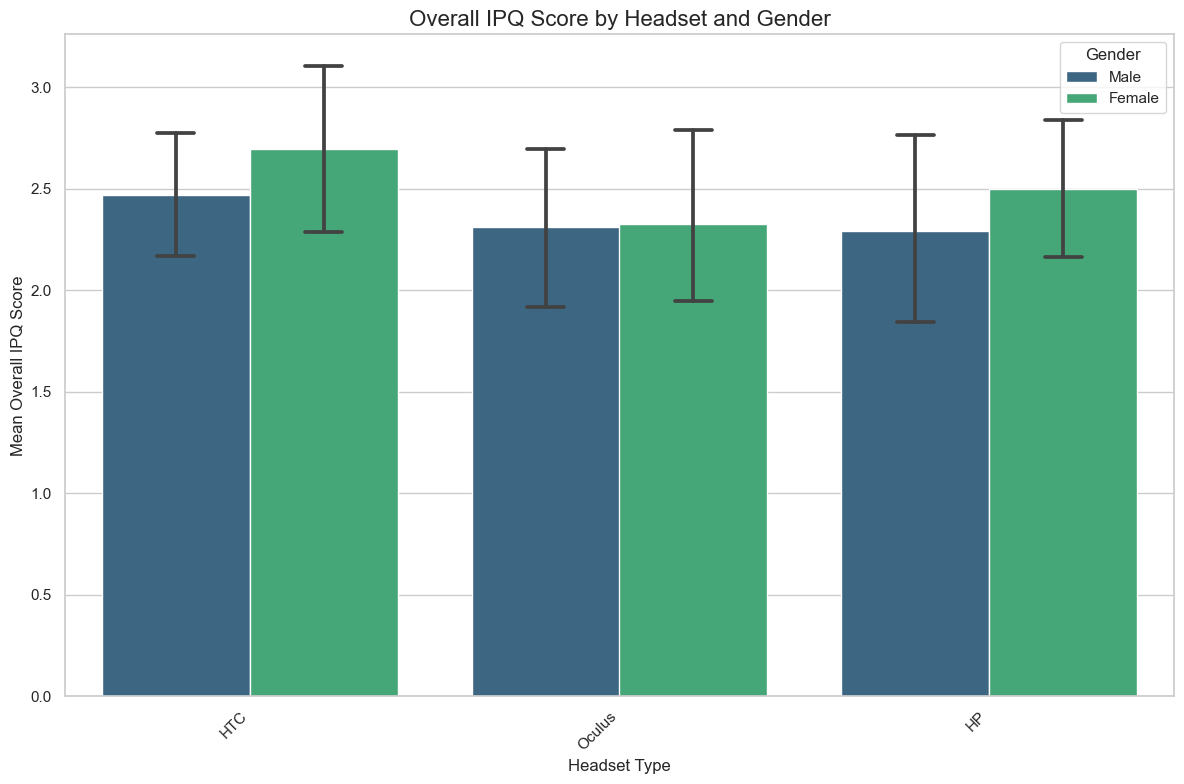

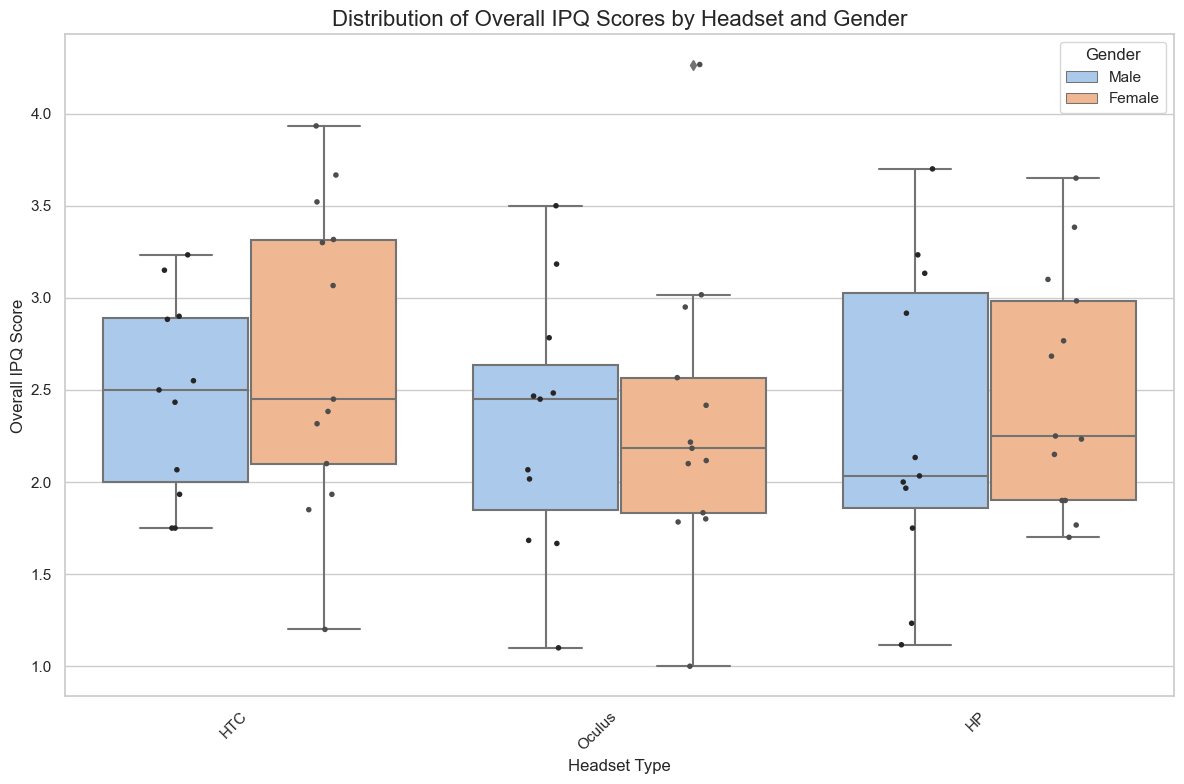

In [7]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Clean fields
df['HeadSet'] = df['HeadSet'].astype(str).str.strip()
df['Gender']  = df['Gender'].astype(str).str.strip().str.title()  # e.g., 'Male', 'Female'
df['Gender']  = df['Gender'].replace({'M':'Male','F':'Female'})    # just in case

# # Rename columns (same as you had)
# df.rename(columns={
#     'In the computer generated world I had a sense of "being there"': 'GP',
#     'Somehow I felt that the virtual world surrounded me.': 'SP1',
#     'I felt like I was just perceiving pictures.': 'SP2',
#     '(-) I did not feel present in the virtual space.': 'SP3',
#     'I had a sense of acting in the virtual space, rather than operating something outside in real world.': 'SP4',
#     'I felt present in the virtual space.': 'SP5',
#     aw_col: 'INV1',
#     'I was not aware of my real environment.': 'INV2',
#     'I still paid attention to the real environment.': 'INV3',
#     'How real did the virtual world seem to you?': 'REAL1',
#     'How much did your experience in the virtual environment seem consistent with your real world experience ?': 'REAL2',
#     'The virtual world seemed more realistic than the real world.': 'REAL3'
# }, inplace=True)

# Reverse-code
df['SP2_rev'] = 4 - df['SP2']
df['SP3_rev'] = 4 - df['SP3']
df['INV1_rev'] = 4 - df['INV1']
df['INV3_rev'] = 4 - df['INV3']

# Subscales
df['GeneralPresence'] = df['GP']
df['SpatialPresence'] = df[['SP1','SP2_rev','SP3_rev','SP4','SP5']].mean(axis=1)
df['Involvement']     = df[['INV1_rev','INV2','INV3_rev']].mean(axis=1)
df['Realism']         = df[['REAL1','REAL2','REAL3']].mean(axis=1)

# --- MODIFICATION: Calculate Overall IPQ Score ---
df['IPQ_Overall'] = df[['GeneralPresence', 'SpatialPresence', 'Involvement', 'Realism']].mean(axis=1)


# Balance: keep only participants who have data for all headset levels
treatments = df['HeadSet'].unique()
counts = df.groupby('UniqueID')['HeadSet'].nunique()
complete_ids = counts[counts == len(treatments)].index
df_balanced = df[df['UniqueID'].isin(complete_ids)].copy()

print(f"Unique headsets considered: {treatments}")
print(f"Participants with data for all {len(treatments)} headsets: {len(complete_ids)}\n")

# --- MODIFICATION: Add IPQ_Overall to the list of scales for analysis ---
scales = ['GeneralPresence', 'SpatialPresence', 'Involvement', 'Realism', 'IPQ_Overall']

if len(complete_ids) > 0:
    for scale in scales:
        # Keep only needed columns and drop rows with missing values in this DV
        dat = df_balanced[['UniqueID', 'HeadSet', 'Gender', scale]].dropna()

        # Ensure categorical types
        dat['UniqueID'] = dat['UniqueID'].astype(str)
        dat['HeadSet']  = dat['HeadSet'].astype('category')
        dat['Gender']   = dat['Gender'].astype('category')

        print(f"\n=== Mixed ANOVA for {scale} (within: HeadSet, between: Gender) ===")
        aov = pg.mixed_anova(dv=scale, within='HeadSet', between='Gender',
                             subject='UniqueID', data=dat, effsize='np2')
        print(aov)
        # Check if the main effect of 'HeadSet' is significant
        p_val_headset = aov.loc[aov['Source'] == 'HeadSet', 'p-unc'].iloc[0]

        if p_val_headset < 0.05:
            print(f"\n--- Post-hoc test for HeadSet on {scale} (p={p_val_headset:.3f}) ---")

            # Perform pairwise T-tests for the within-subject factor 'HeadSet'
            # 'padjust' applies a correction for multiple comparisons
            posthocs = pg.pairwise_tests(data=dat, dv=scale, within='HeadSet',
                                         subject='UniqueID', padjust='holm')
            print(posthocs)

# --- MODIFICATION: Visualization of Overall IPQ Score ---
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Bar plot to show mean scores and confidence intervals
ax = sns.barplot(x='HeadSet', y='IPQ_Overall', hue='Gender', data=df_balanced,
                 palette='viridis', capsize=0.1)

plt.title('Overall IPQ Score by Headset and Gender', fontsize=16)
plt.xlabel('Headset Type', fontsize=12)
plt.ylabel('Mean Overall IPQ Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('ipq_overall_barplot.png')


print("\nVisualization saved as 'ipq_overall_barplot.png'")


# Alternative Visualization: Box Plot to show data distribution
plt.figure(figsize=(12, 8))

# Box plot
ax = sns.boxplot(x='HeadSet', y='IPQ_Overall', hue='Gender', data=df_balanced,
                 palette='pastel')

# Optional: overlay strip plot to show individual data points
sns.stripplot(x='HeadSet', y='IPQ_Overall', hue='Gender', data=df_balanced,
              size=4, color=".3", linewidth=0, dodge=True)


plt.title('Distribution of Overall IPQ Scores by Headset and Gender', fontsize=16)
plt.xlabel('Headset Type', fontsize=12)
plt.ylabel('Overall IPQ Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Improve legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title='Gender') # Show legend for boxplot only
plt.tight_layout()
plt.savefig('ipq_overall_boxplot.png')


print("Alternative visualization saved as 'ipq_overall_boxplot.png'")

In [15]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# 1. Load data
import pandas as pd
import statsmodels.formula.api as smf

# 1. Load and prepare data
df = pd.read_csv(r'C:\Users\goatp\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\IgroupPresenceQuestionnaire.csv')
df['HeadSet'] = df['HeadSet'].str.strip()  # standardize headset names
aw_col = [c for c in df.columns if c.startswith('How aware')][0]
df.rename(columns={
    'In the computer generated world I had a sense of "being there"': 'GP',
    'Somehow I felt that the virtual world surrounded me.': 'SP1',
    'I felt like I was just perceiving pictures.': 'SP2',
    '(-) I did not feel present in the virtual space.': 'SP3',
    'I had a sense of acting in the virtual space, rather than operating something outside in real world.': 'SP4',
    'I felt present in the virtual space.': 'SP5',
    aw_col: 'INV1',
    'I was not aware of my real environment.': 'INV2',
    'I still paid attention to the real environment.': 'INV3',
    'How real did the virtual world seem to you?': 'REAL1',
    'How much did your experience in the virtual environment seem consistent with your real world experience ?': 'REAL2',
    'The virtual world seemed more realistic than the real world.': 'REAL3'
}, inplace=True)

# 2. Reverse‐code negatively keyed items (1–5 scale)
for col in ['SP2','SP3','INV1','INV3']:
    df[f'{col}_rev'] = 4 - df[col]

# 3. Compute subscale scores
df['GeneralPresence'] = df['GP']
df['SpatialPresence'] = df[['GP','SP1','SP2_rev','SP3_rev','SP4','SP5']].mean(axis=1)
df['Involvement']     = df[['INV1_rev','INV2','INV3_rev']].mean(axis=1)
df['Realism']         = df[['REAL1','REAL2','REAL3']].mean(axis=1)

# 4. Descriptive means by Headset and Gender
desc = df.groupby(['HeadSet','Gender'])[['GeneralPresence','SpatialPresence','Involvement','Realism']].mean().round(2).reset_index()

# 5. Mixed‐effects models: test main effects of Headset, Gender, and their interaction
for scale in ['GeneralPresence','SpatialPresence','Involvement','Realism']:
    print(f"\n=== Mixed Model Results for {scale} ===")
    model = smf.mixedlm(f"{scale} ~ C(HeadSet)*C(Gender)", df, groups=df['UniqueID'])
    result = model.fit(reml=False)
    print(result.summary())



=== Mixed Model Results for GeneralPresence ===
                      Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       GeneralPresence
No. Observations:         72            Method:                   ML             
No. Groups:               24            Scale:                    0.7127         
Min. group size:          3             Log-Likelihood:           -99.5935       
Max. group size:          3             Converged:                Yes            
Mean group size:          3.0                                                    
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               3.462    0.278 12.451 0.000  2.917  4.006
C(HeadSet)[T.HTC]                      -0.077    0.331 -0.232 0.816 -0.

Descriptive Means by Headset and Gender
(See the interactive table “IPQ Means by Headset and Gender” displayed above for group‐specific means.)

Mixed Model Summaries
Below is an excerpt for SpatialPresence (other subscales follow similarly). Key fixed‐effect coefficients:

| Effect                              |  Coef. | Std.Err. |      z | p-value |
| ----------------------------------- | -----: | -------: | -----: | ------: |
| **Intercept** (Female, HP baseline) |  2.385 |    0.244 |  9.782 |   <.001 |
| **HeadSet = HTC**                   |  0.500 |    0.235 |  2.131 |   0.033 |
| **HeadSet = Oculus**                |  0.115 |    0.235 |  0.492 |   0.623 |
| **Gender = Male**                   |  0.138 |    0.360 |  0.384 |   0.701 |
| **HTC × Male**                      | –0.523 |    0.346 | –1.509 |   0.131 |
| **Oculus × Male**                   | –0.047 |    0.346 | –0.136 |   0.892 |


Main effect of HeadSet is significant for SpatialPresence, with HTC > HP (p = 0.033).

No main effect of Gender on SpatialPresence (p = 0.701).

No significant interactions (p > 0.13), indicating the headset effect was similar across genders.



In [6]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Load and prepare data
df = pd.read_csv(r'C:\Users\goatp\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\IgroupPresenceQuestionnaire.csv')
df['HeadSet'] = df['HeadSet'].str.strip()  # standardize headset names
# Ensure HeadSet is categorical with Oculus as reference
df['HeadSet'] = pd.Categorical(df['HeadSet'], categories=['Oculus', 'HTC', 'HP'])

# 2. Rename IPQ items
aw_col = [c for c in df.columns if c.startswith('How aware')][0]
df.rename(columns={
    'In the computer generated world I had a sense of "being there"': 'GP',
    'Somehow I felt that the virtual world surrounded me.': 'SP1',
    'I felt like I was just perceiving pictures.': 'SP2',
    '(-) I did not feel present in the virtual space.': 'SP3',
    'I had a sense of acting in the virtual space, rather than operating something outside in real world.': 'SP4',
    'I felt present in the virtual space.': 'SP5',
    aw_col: 'INV1',
    'I was not aware of my real environment.': 'INV2',
    'I still paid attention to the real environment.': 'INV3',
    'How real did the virtual world seem to you?': 'REAL1',
    'How much did your experience in the virtual environment seem consistent with your real world experience ?': 'REAL2',
    'The virtual world seemed more realistic than the real world.': 'REAL3'
}, inplace=True)

# 3. Reverse-code negatively keyed items (1–5 scale)
for col in ['SP2','SP3','INV1','INV3']:
    df[f'{col}_rev'] = 4 - df[col]

# 4. Compute subscale scores
df['GeneralPresence'] = df['GP']
df['SpatialPresence'] = df[['SP1','SP2_rev','SP3_rev','SP4','SP5']].mean(axis=1)
df['Involvement']     = df[['INV1_rev','INV2','INV3_rev']].mean(axis=1)
df['Realism']         = df[['REAL1','REAL2','REAL3']].mean(axis=1)

# 5. Mixed-effects models with Oculus as baseline
for scale in ['GeneralPresence','SpatialPresence','Involvement','Realism']:
    print(f"\n=== Mixed Model for {scale} (Oculus baseline) ===")
    model = smf.mixedlm(f"{scale} ~ C(HeadSet, Treatment(reference='Oculus'))*C(Gender)", 
                        df, groups=df['UniqueID'])
    result = model.fit(reml=False)
    print(result.summary())



=== Mixed Model for GeneralPresence (Oculus baseline) ===
                                    Mixed Linear Model Regression Results
Model:                            MixedLM                 Dependent Variable:                 GeneralPresence
No. Observations:                 72                      Method:                             ML             
No. Groups:                       24                      Scale:                              0.7127         
Min. group size:                  3                       Log-Likelihood:                     -99.5935       
Max. group size:                  3                       Converged:                          Yes            
Mean group size:                  3.0                                                                        
-------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.   z    P>|z| [

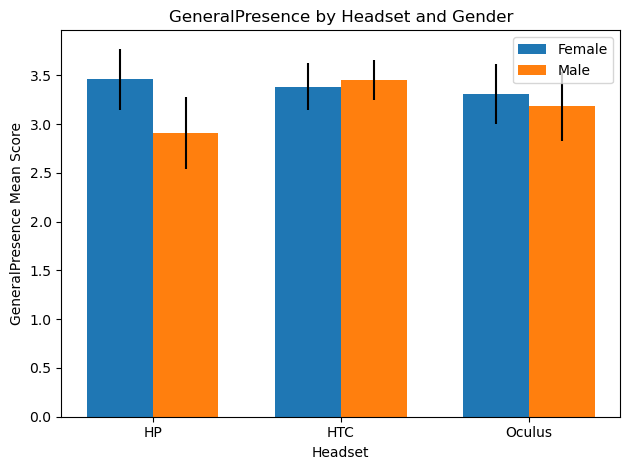

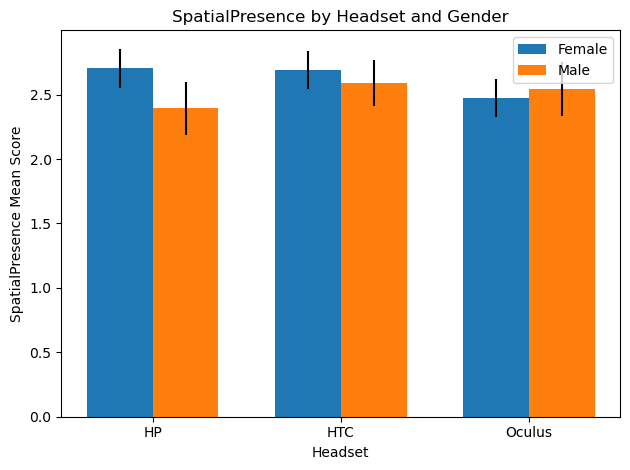

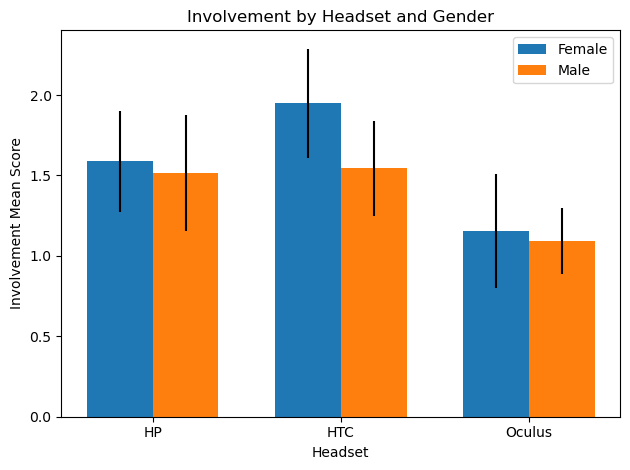

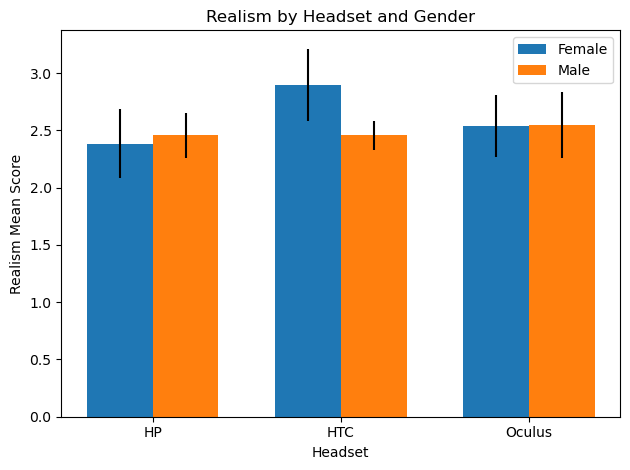

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and prepare data
df = pd.read_csv(r'C:\Users\goatp\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\IgroupPresenceQuestionnaire.csv')
df['HeadSet'] = df['HeadSet'].str.strip()

# 2. Rename items
aw_col = [c for c in df.columns if c.startswith('How aware')][0]
df.rename(columns={
    'In the computer generated world I had a sense of "being there"': 'GP',
    'Somehow I felt that the virtual world surrounded me.': 'SP1',
    'I felt like I was just perceiving pictures.': 'SP2',
    '(-) I did not feel present in the virtual space.': 'SP3',
    'I had a sense of acting in the virtual space, rather than operating something outside in real world.': 'SP4',
    'I felt present in the virtual space.': 'SP5',
    aw_col: 'INV1',
    'I was not aware of my real environment.': 'INV2',
    'I still paid attention to the real environment.': 'INV3',
    'How real did the virtual world seem to you?': 'REAL1',
    'How much did your experience in the virtual environment seem consistent with your real world experience ?': 'REAL2',
    'The virtual world seemed more realistic than the real world.': 'REAL4'
}, inplace=True)

# 3. Reverse-code negatively keyed items
for col in ['SP2','SP3','INV1','INV3']:
    df[f'{col}_rev'] = 4 - df[col]

# 4. Compute subscales
df['GeneralPresence'] = df['GP']
df['SpatialPresence'] = df[['GP','SP1','SP2_rev','SP3_rev','SP4','SP5']].mean(axis=1)
df['Involvement']     = df[['INV1_rev','INV2','INV3_rev']].mean(axis=1)
df['Realism']         = df[['REAL1','REAL2','REAL4']].mean(axis=1)

# 5. Plot bar charts for each subscale
subscales = ['GeneralPresence','SpatialPresence','Involvement','Realism']
for sub in subscales:
    # Group means and SEM by Headset and Gender
    summary = df.groupby(['HeadSet','Gender'])[sub].agg(['mean','sem']).unstack('Gender')
    x = np.arange(len(summary.index))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, summary['mean']['Female'], width, yerr=summary['sem']['Female'], label='Female')
    ax.bar(x + width/2, summary['mean']['Male'], width, yerr=summary['sem']['Male'], label='Male')
    ax.set_xticks(x)
    ax.set_xticklabels(summary.index)
    ax.set_xlabel('Headset')
    ax.set_ylabel(f'{sub} Mean Score')
    ax.set_title(f'{sub} by Headset and Gender')
    ax.legend()
    plt.tight_layout()
    plt.show()
